# Random Forest - HyperParameters

## Imports & Data

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df = pd.read_excel("rice.xlsx")

1. Alan: Pirinç tanesinin sınırları içindeki piksel sayısını verir.
2. Çevre: Pirinç tanesinin sınırları etrafındaki pikseller arasındaki mesafeyi hesaplayarak çevreyi hesaplar.
3. Ana Eksen Uzunluğu: Pirinç tanesi üzerine çizilebilecek en uzun çizgiyi yani ana eksen mesafesini verir.
4. Küçük Eksen Uzunluğu: Pirinç tanesine çizilebilecek en kısa çizgiyi yani küçük eksen mesafesini verir.
5. Eksantriklik: Pirinç tanesi ile aynı momentlere sahip olan elipsin ne kadar yuvarlak olduğunu ölçer.
6. Dışbükey Alan: Pirinç tanesinin oluşturduğu bölgenin en küçük dışbükey kabuğunun piksel sayısını verir.
7. Kapsam: Pirinç tanesinin oluşturduğu bölgenin sınırlayıcı kutu piksellerine oranını verir
8. Sınıf: Commeo ve Osmancık.

https://www.kaggle.com/datasets/muratkokludataset/rice-dataset-commeo-and-osmancik

Murat hocamıza sevgilerimizi gönderiyoruz

In [91]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


---
## EDA, Veri Kontrol ve Görselleştirme

In [92]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


In [94]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [95]:
df["Class"].unique()

array(['Cammeo', 'Osmancik'], dtype=object)

<AxesSubplot:xlabel='Class', ylabel='count'>

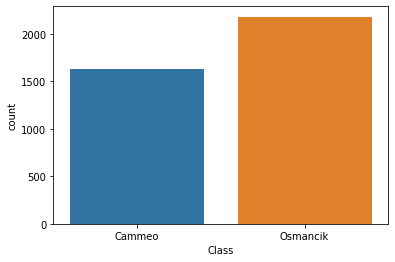

In [96]:
sns.countplot(x="Class",data=df)

In [97]:
df["Class"].value_counts()

Osmancik    2180
Cammeo      1630
Name: Class, dtype: int64

In [98]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

<AxesSubplot:xlabel='Area', ylabel='Perimeter'>

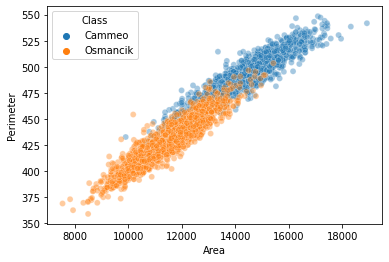

In [99]:
sns.scatterplot(x="Area", y="Perimeter", data=df, hue="Class", alpha=0.4)

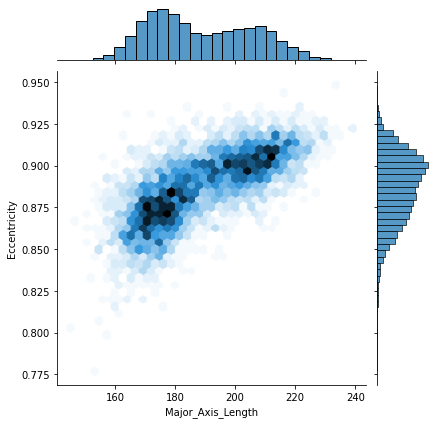

In [100]:
sns.jointplot(kind="hex", x="Major_Axis_Length", y="Eccentricity", data=df)
# https://www.mathsisfun.com/geometry/eccentricity.html

<AxesSubplot:xlabel='Class', ylabel='Extent'>

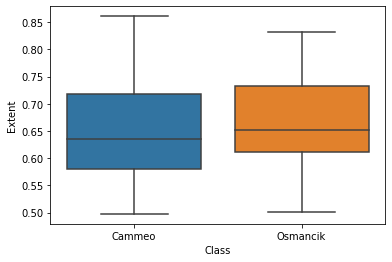

In [101]:
sns.boxplot(x="Class", y="Extent", data=df)

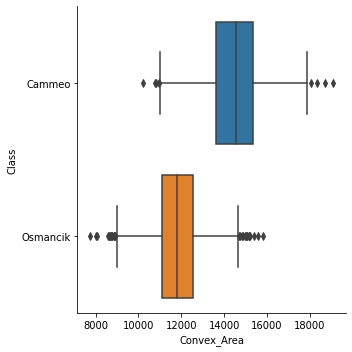

In [102]:
sns.catplot(x="Convex_Area", y="Class", data=df, kind="box")

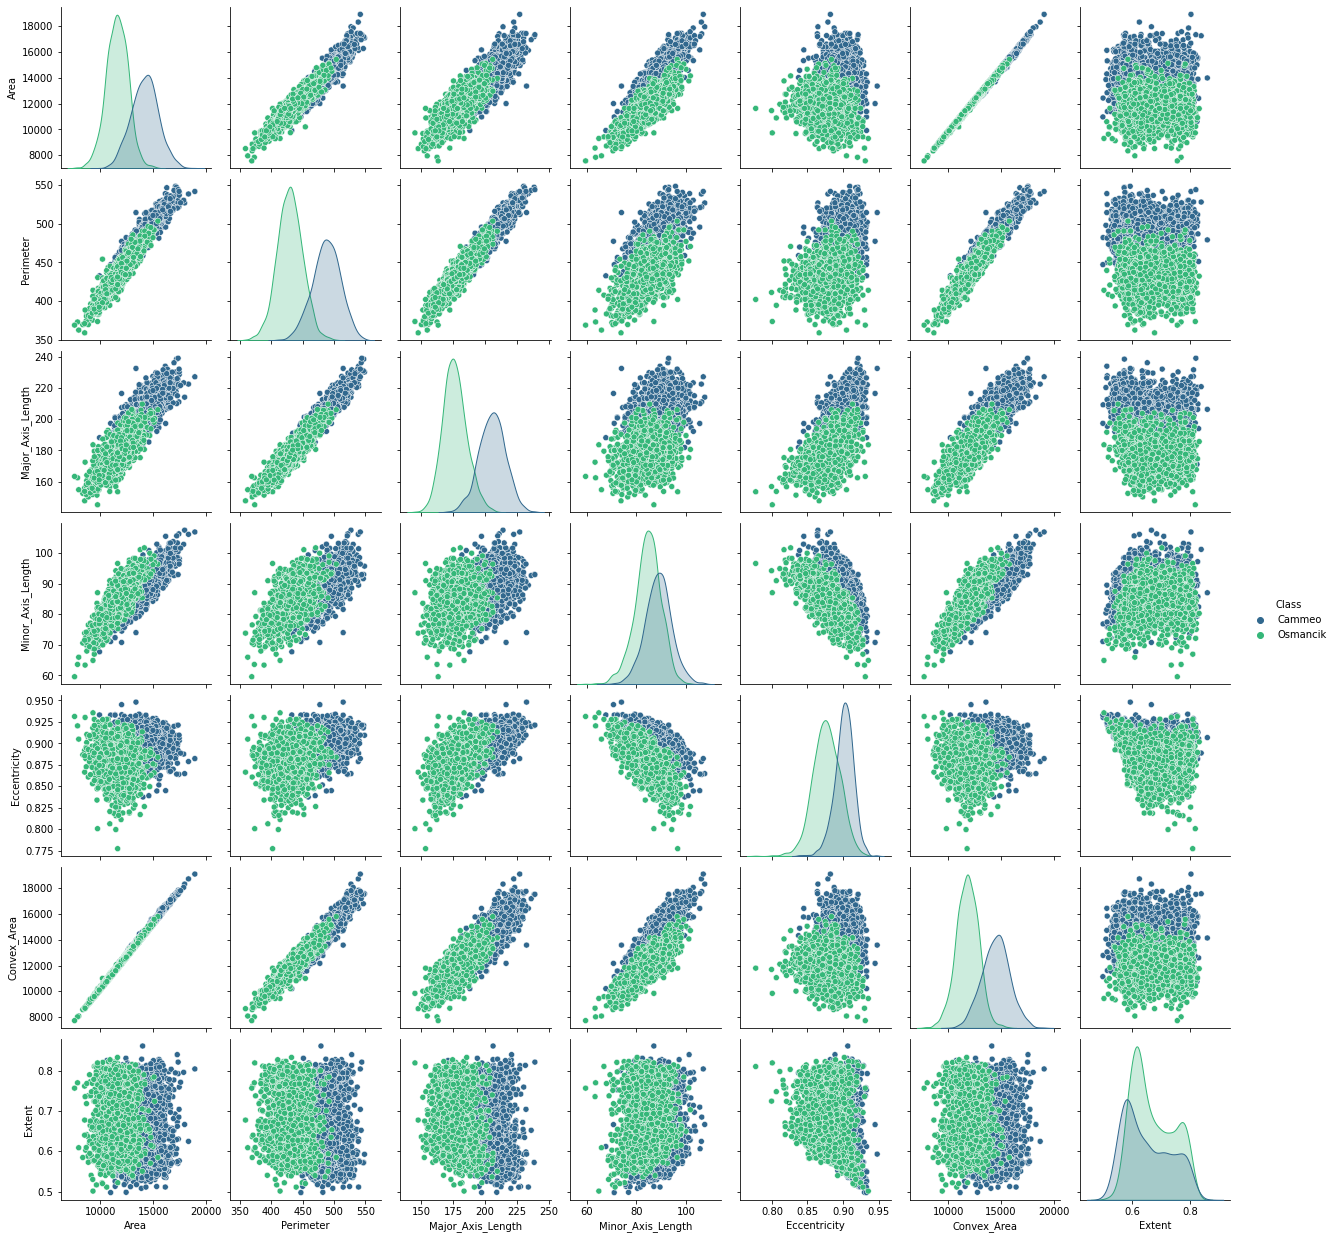

In [103]:
sns.pairplot(df, hue="Class", palette="viridis")

In [104]:
df.corr()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Area,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184
Perimeter,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923
Major_Axis_Length,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562
Minor_Axis_Length,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366
Eccentricity,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580
Convex_Area,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826
Extent,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000


<AxesSubplot:>

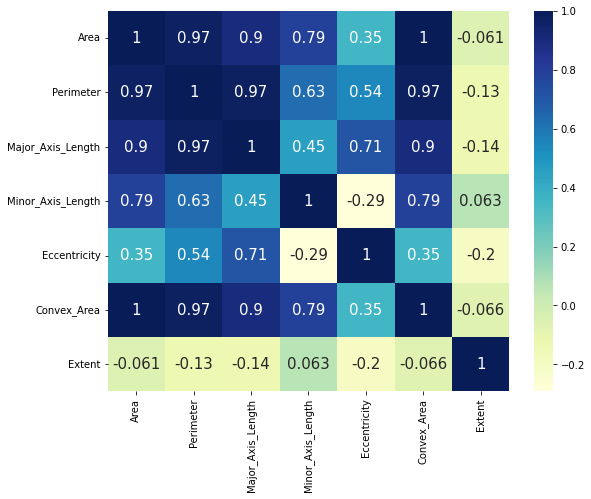

In [105]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), annot=True, annot_kws={"fontsize":15}, cmap="YlGnBu")

---
## Train Test Split

In [106]:
X = df.drop("Class", axis=1)
y = pd.get_dummies(df["Class"], drop_first=True)

In [107]:
y

,Osmancik
0,0
1,0
2,0
3,0
4,0
...,...
3805,1
3806,1
3807,1
3808,1


In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
random_state=9, test_size=0.1)

---
## Hiper Parametereleri Belirlemek & Random Forest Model
(HyperParameters)

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [110]:
n_est = [9,64,128,200]
max_feat = [1,2,3,4]
bootstrap_sec = [True, False]
oob = [True, False] # oob_score, oob değeri bootstrap True iken kullanılır.

In [111]:
parameters= {
    "n_estimators" : n_est,
    "max_features" : max_feat,
    "bootstrap" : bootstrap_sec,
    "oob_score" : oob
}

In [112]:
random_forest = RandomForestClassifier()
grid = GridSearchCV(random_forest, parameters)

In [113]:
grid.fit(X_train, y_train)

c:\Users\mbatu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\mbatu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\mbatu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\mbatu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarn

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 4],
                         'n_estimators': [9, 64, 128, 200],
                         'oob_score': [True, False]})

In [114]:
grid.best_estimator_

RandomForestClassifier(max_features=1, n_estimators=200)

In [115]:
grid.best_params_

{'bootstrap': True, 'max_features': 1, 'n_estimators': 200, 'oob_score': False}

In [116]:
pilav_pred = grid.predict(X_test)

----
## Değerlendirme

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [118]:
confusion_matrix(y_test, pilav_pred)

array([[160,  22],
       [ 12, 187]], dtype=int64)

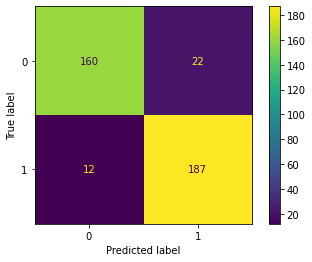

In [119]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

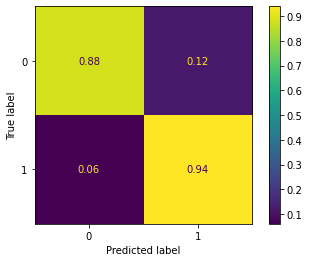

In [120]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, normalize="true")

In [121]:
print(classification_report(y_test,pilav_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       182
           1       0.89      0.94      0.92       199

    accuracy                           0.91       381
   macro avg       0.91      0.91      0.91       381
weighted avg       0.91      0.91      0.91       381



---
## Estimatör Sayısı Hakkında

In [122]:
from sklearn.metrics import accuracy_score

In [157]:
hata_payi = []
yanlis_secim = []

for n in range(1, 128):
    rand_forest_class = RandomForestClassifier(n_estimators=n, bootstrap=True, max_features=2)
    rand_forest_class.fit(X_train, y_train)
    pirinc_preds = rand_forest_class.predict(X_test)
    error = 1 - accuracy_score(pirinc_preds, y_test)

    sample = y_test.to_numpy()
    sample = sample.reshape(1,-1)[0] 
    # y_test ve pirinc_preds'in türleri farklı olduğu için bu işlem yapıldı

    n_missed = np.sum(pirinc_preds != sample)
    hata_payi.append(error)
    yanlis_secim.append(n_missed)

C:\Users\mbatu\AppData\Local\Temp\ipykernel_18852\731097663.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest_class.fit(X_train, y_train)
C:\Users\mbatu\AppData\Local\Temp\ipykernel_18852\731097663.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest_class.fit(X_train, y_train)
C:\Users\mbatu\AppData\Local\Temp\ipykernel_18852\731097663.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest_class.fit(X_train, y_train)
C:\Users\mbatu\AppData\Local\Temp\ipykernel_18852\731097663.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using

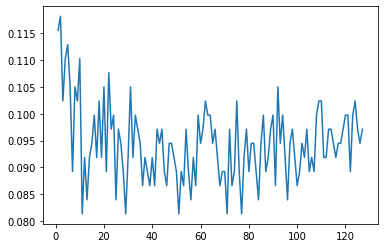

In [158]:
plt.plot(range(1,128), hata_payi)

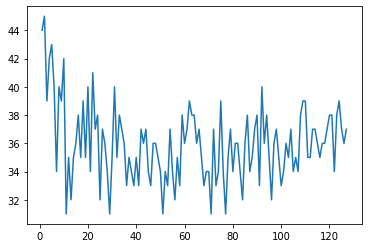

In [159]:
plt.plot(range(1,128), yanlis_secim)

---
---

# **https://www.youtube.com/watch?v=qI-k9QGNbR8**